<a href="https://colab.research.google.com/github/sanyagupta31/-Weather-Dashboard/blob/main/01_weather_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ========================
# 1. Import Libraries
# ========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [ ]:
# ========================
# 2. Load Data
# ========================
df = pd.read_csv("weatherHistory.csv")
print(df.head())
print(df.info())
print(df.describe())

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

In [ ]:
# ========================
# 3. Data Cleaning
# ========================

# Missing values
print("Missing values:\n", df.isnull().sum())
df = df.drop_duplicates()


Missing values:
 Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [ ]:
# Convert date
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], utc=True)
df["year"] = df["Formatted Date"].dt.year
df["month"] = df["Formatted Date"].dt.month
df["day"] = df["Formatted Date"].dt.day
df["hour"] = df["Formatted Date"].dt.hour


In [ ]:
# Encode categorical
le = LabelEncoder()
df["Summary"] = le.fit_transform(df["Summary"])
df["Precip Type"] = df["Precip Type"].fillna("rain")   # fill missing
df["Precip Type"] = le.fit_transform(df["Precip Type"])


In [ ]:
# Drop Loud Cover (constant = 0)
df = df.drop(columns=["Loud Cover"])


In [ ]:
# Scaling
scaler = StandardScaler()
df[["Temperature (C)", "Apparent Temperature (C)", "Humidity",
    "Wind Speed (km/h)", "Visibility (km)", "Pressure (millibars)"]] = scaler.fit_transform(
    df[["Temperature (C)", "Apparent Temperature (C)", "Humidity",
       "Wind Speed (km/h)", "Visibility (km)", "Pressure (millibars)"]])

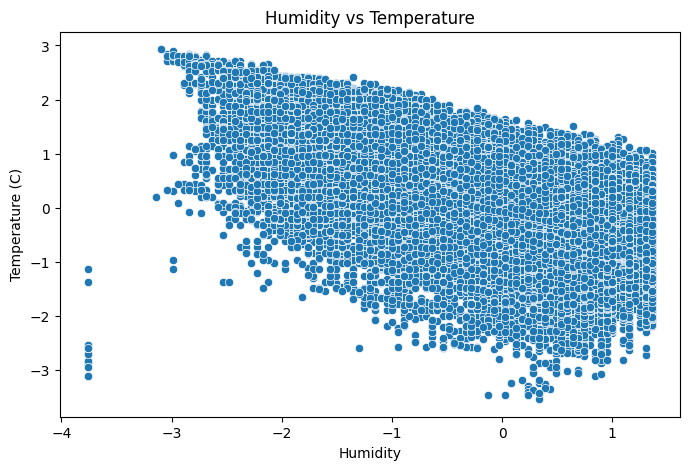

In [ ]:
# ========================
# 4. Exploratory Analysis
# ========================
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Humidity"], y=df["Temperature (C)"])
plt.title("Humidity vs Temperature")
plt.show()

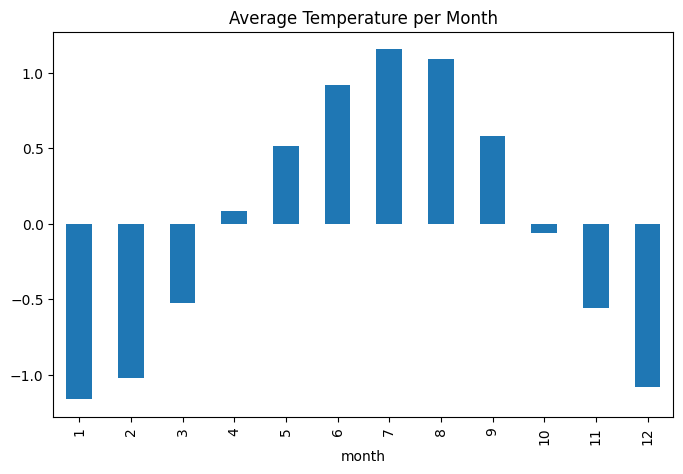

In [ ]:

# Seasonal analysis
seasonal = df.groupby("month")["Temperature (C)"].mean()
seasonal.plot(kind="bar", title="Average Temperature per Month", figsize=(8,5))
plt.show()

In [ ]:
# ========================
# 5. Model Building
# ========================

# Example: Predict Precip Type (rain/snow)
X = df.drop(columns=["Precip Type", "Formatted Date", "Daily Summary"])
y = df["Precip Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# ========================
# 6. Model Checking
# ========================
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     17087
           1       0.94      0.97      0.95      2199

    accuracy                           0.99     19286
   macro avg       0.97      0.98      0.97     19286
weighted avg       0.99      0.99      0.99     19286

Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17087
           1       1.00      1.00      1.00      2199

    accuracy                           1.00     19286
   macro avg       1.00      1.00      1.00     19286
weighted avg       1.00      1.00      1.00     19286



In [ ]:
# ========================
# 7. Results & Insights
# ========================
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Random Forest Accuracy: 1.0
Logistic Regression Accuracy: 0.9889557191745307


In [ ]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go

df["Formatted Date"] = pd.to_datetime(df["Formatted Date"])
df["month"] = df["Formatted Date"].dt.month

# ==== Subplots  ====
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Humidity vs Temp", "Temp Trend", "Avg Temp by Month")
)

# 1st plot: Scatter (Humidity vs Temperature)
fig.add_trace(
    go.Scatter(
        x=df["Humidity"],
        y=df["Temperature (C)"],
        mode='markers',
        marker=dict(color="blue"),
        name="Humidity vs Temp"
    ),
    row=1, col=1
)

# 2nd plot: Line (Temperature Trend over time)
fig.add_trace(
    go.Scatter(
        x=df["Formatted Date"],
        y=df["Temperature (C)"],
        mode='lines',
        line=dict(color="orange"),
        name="Temp Trend"
    ),
    row=1, col=2
)

# 3rd plot: Bar (Average Temperature by Month) – ABSOLUTE VALUES
df_month = df.groupby("month")["Temperature (C)"].mean().reset_index()
df_month["Temperature (C)"] = df_month["Temperature (C)"].abs()   # negative -> positive

fig.add_trace(
    go.Bar(
        x=df_month["month"],
        y=df_month["Temperature (C)"],
        marker_color="green",
        name="Avg Temp by Month"
    ),
    row=1, col=3
)

# ==== Layout update ====
fig.update_layout(
    height=500, width=1200,
    title_text="🌦️ Weather Dashboard (All in One)",
    showlegend=False
)

fig.show()
